In [8]:
import os
import numpy as np
import pandas as pd
import sys
sys.path.append("/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/photofitt/utils/")
from utils import numerical_dose
sys.path.append("/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/photofitt/analysis/")
from mitosis_counting import quantify_peaks
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/photofitt/analysis/")
from mitosis_counting import add_inferred_nuclei

# Load UV mitosis data:
folder = "/home/ocb/HardDrive_4TB/EGM/PHX/ANALYSIS"
path_data = os.path.join(folder, "SYNCHRO","mitosis_and_cell_counting_pix2pix.csv")
data = pd.read_csv(path_data)
print(len(data))
## Choose a path to store the data:
output_path = os.path.join(folder, "pruebas")
os.makedirs(output_path, exist_ok=True)

# Estimate the ligth dose
light_power = 6.255662
data = numerical_dose(data, column_name="Subcategory-02", power=light_power)

# -----
## Generate categorical variables for the light dose
light_dose = np.unique(data["Light dose"])
data["Light dose cat"] = ''
for l in light_dose:
    if l > 0:
        cat = str(np.round(l, decimals=1)) + " J/cm2"
    else:
        cat = 'non-synchro-0 J/cm2'

    data["Light dose cat"][data["Light dose"]==l] = cat
data["Light dose cat"][data["Subcategory-02"]=="Synchro"] = '0 J/cm2'

hue_order = ['non-synchro-0 J/cm2', '0 J/cm2', '0.2 J/cm2',
             '0.3 J/cm2', '0.6 J/cm2', '1.3 J/cm2', '2.5 J/cm2',
             '5.0 J/cm2', '6.3 J/cm2', '31.3 J/cm2', 
             '62.6 J/cm2', '93.8 J/cm2', '125.1 J/cm2', '156.4 J/cm2']


# -----

data["Norm. Percentage"] = data["Number of cells"] / data['cell_counts_stardist']
data["Percentage"] = data["Number of cells"] / data['cell_counts_stardist']
data = data.loc[lambda data: data["Percentage"] >= 0]

403656


/tmp/ipykernel_178276/1898085864.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Light dose cat"][data["Light dose"]==l] = cat
/tmp/ipykernel_178276/1898085864.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Light dose cat"][data["Light dose"]==l] = cat
/tmp/ipykernel_178276/1898085864.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Light dose cat"][data["Light dose"]==l] = cat
/tmp/ipykernel_178276/189

In [10]:
y_var = "Percentage" # "Number of cells" # "Norm. Number of cells"
norm = False 
plot_y_var = y_var
    
# Integrate the information about the temporal peaks of mitosis
#data_peaks = quantify_peaks(data, plot_y_var)
data_peaks = quantify_peaks(data, plot_y_var)

data_peaks = numerical_dose(data_peaks, column_name="Subcategory-02", power=6.255662)
## Generate categorical variables for the light dose
light_dose = np.unique(data_peaks["Light dose"])
data_peaks["Light dose cat"] = ''
for l in light_dose:
    if l > 0:
        cat = str(np.round(l, decimals=1)) + " J/cm2"
    else:
        cat = 'non-synchro-0 J/cm2'
    
    data_peaks["Light dose cat"][data_peaks["Light dose"]==l] = cat
data_peaks["Light dose cat"][data_peaks["Subcategory-02"]=="Synchro"] = '0 J/cm2'

/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/photofitt/analysis/mitosis_counting.py:275: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2571428571428571' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  folder_wise.loc[index_v, 'Number of resistant cells'] = resistant_cells
/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/photofitt/analysis/mitosis_counting.py:275: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.18181818181818182' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  folder_wise.loc[index_v, 'Number of resistant cells'] = resistant_cells
/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/photofitt/analysis/mitosis_counting.py:275: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.19631901840490798' has 

/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


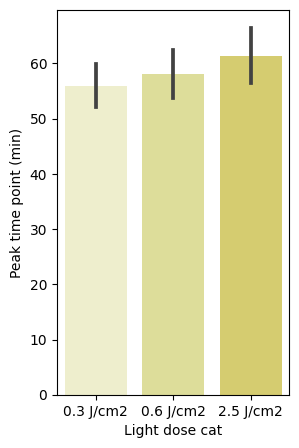

/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


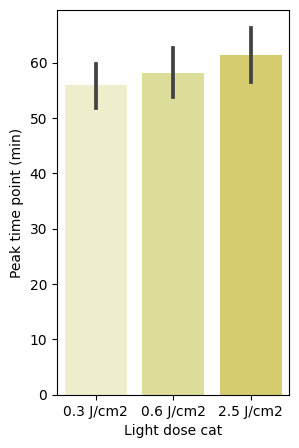

/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


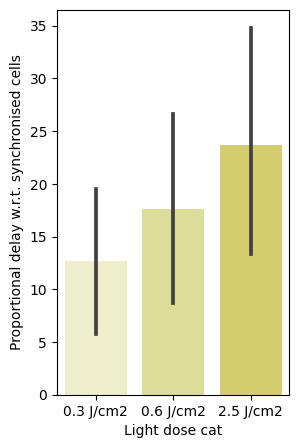

/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


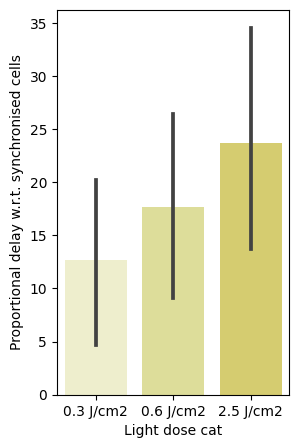

In [11]:
#### Show each distribution with both violins and points

## Rename the columns to get the proper naming in the plots
data_peaks = data_peaks.rename(columns={'peak_time': 'Peak time point (min)', 
                            'delay_synchro': 'Delay w.r.t. synchronised cells (min)',
                           'proportional_delay_synchro': 'Proportional delay w.r.t. synchronised cells'})

groups = ['0.3 J/cm2', '0.6 J/cm2', '2.5 J/cm2']


x_var = ["Peak time point (min)", "Proportional delay w.r.t. synchronised cells"]
fig_format = ["png", "pdf"]
for x in x_var:
    for f in fig_format:
        name = "{0}.{1}".format(x, f) # name we want to give to the plot
        new_name="average_mitotic_delay{}".format(name)
        fig = plt.figure(figsize=(3,5))
        sns.barplot(data_peaks, x='Light dose cat', y=x, palette=sns.color_palette("CMRmap_r", 17), order=groups)
        fig.savefig(os.path.join(output_path, new_name), format=f, transparent=True)
        plt.show()


        
        

In [36]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'frame', 'Number of cells', 'cell_size',
       'roundness_axis', 'roundness_projected', 'Subcategory-00',
       'Subcategory-01', 'Subcategory-02', 'Norm. Number of cells',
       'processing', 'video_name', 'cell_counts_stardist', 'Exposure time',
       'Light dose', 'Light dose cat', 'Norm. Percentage', 'Percentage'],
      dtype='object')

In [ ]:
from photofitt.analysis import extract_gaussian_params
# We still use the data calculated in 1. We use the raw data, but one could used the smooth data.
data = data[data["processing"]=="Raw"].reset_index(drop=True)

## Estimate statistical parameters for the cell size temporal distribution
variable = "cell_size"
distribution_data = extract_gaussian_params(data, variable)
# We save the data so we can use it latter.
os.makedirs(output_path, exist_ok=True)
distribution_data.to_csv(os.path.join(output_path, "cell_size_statistics.csv"))

/tmp/ipykernel_178276/1033087579.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Light dose cat"][data["Light dose"]==l] = cat
/tmp/ipykernel_178276/1033087579.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Light dose cat"][data["Light dose"]==l] = cat
/tmp/ipykernel_178276/1033087579.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Light dose cat"][data["Light dose"]==l] = cat
/tmp/ipykernel_178276/103

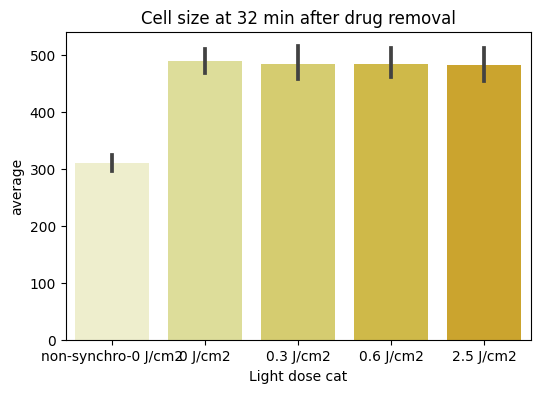

/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


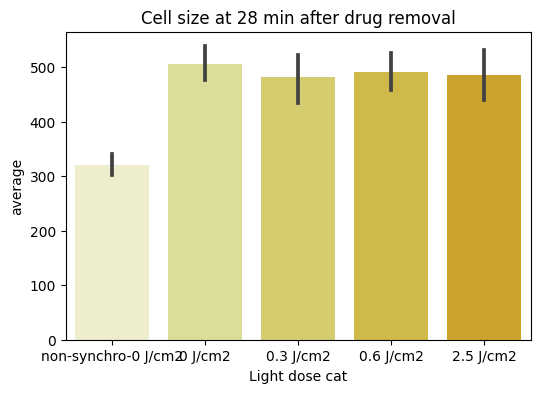

/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


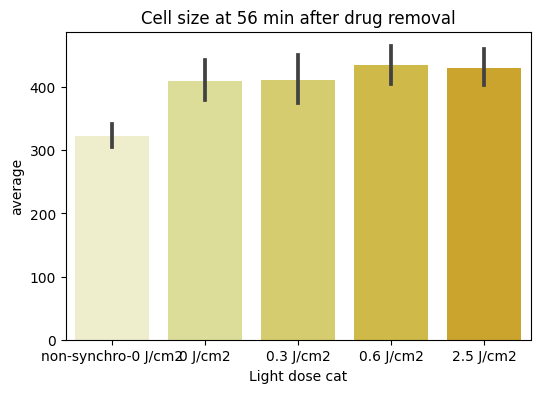

/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


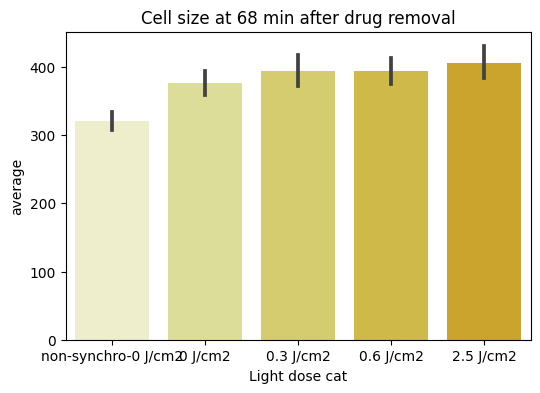

/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ocb/miniconda3/envs/photofitt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


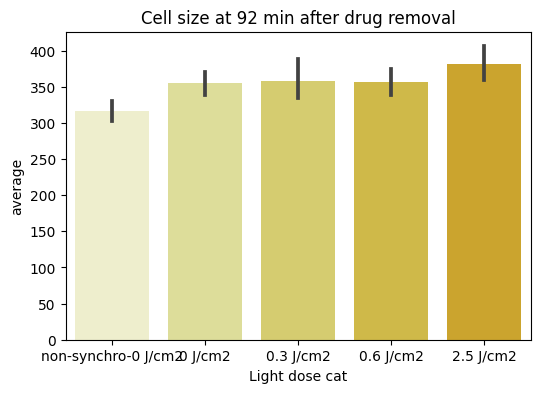

In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/ocb/HardDrive_4TB/EGM/PHX/PhotoFITT/photofitt/utils/")
from utils import numerical_dose

# Load UV mitosis data:
folder = "/home/ocb/HardDrive_4TB/EGM/PHX/ANALYSIS"
## Choose a path to store the data:
output_path = os.path.join(folder, "pruebas")
distribution_data = pd.read_csv(os.path.join(output_path, "cell_size_statistics.csv"))

# Estimate the ligth dose
light_power = 6.255662
data = numerical_dose(distribution_data, column_name="Subcategory-02", power=light_power)
data["frame"] = pd.to_numeric(data["frame"])

# -----
## Generate categorical variables for the light dose
light_dose = np.unique(data["Light dose"])
data["Light dose cat"] = ''
for l in light_dose:
    if l > 0:
        cat = str(np.round(l, decimals=1)) + " J/cm2"
    else:
        cat = 'non-synchro-0 J/cm2'

    data["Light dose cat"][data["Light dose"]==l] = cat
data["Light dose cat"][data["Subcategory-02"]=="Synchro"] = '0 J/cm2'

hue_order = ['non-synchro-0 J/cm2', '0 J/cm2', '0.2 J/cm2',
             '0.3 J/cm2', '0.6 J/cm2', '1.3 J/cm2', '2.5 J/cm2',
             '5.0 J/cm2', '6.3 J/cm2', '31.3 J/cm2', 
             '62.6 J/cm2', '93.8 J/cm2', '125.1 J/cm2', '156.4 J/cm2']
# -----

groups = ['non-synchro-0 J/cm2', '0 J/cm2','0.3 J/cm2', '0.6 J/cm2', '2.5 J/cm2']

## TODO: This filtering is needed for us but should dissapear from the notebook
data_1 = data[data["frame"]< 40]
data_1 = data_1[data_1["frame"]> 30]
data_1 = data_1.reset_index(drop=True)

x_var = ["average"]
fig_format = ["png"]
for var in x_var:
    for f in fig_format:
        n=data_1["frame"][0]
        name = f"_{var}_{n}.{f}" # name we want to give to the plot
        new_name="average_cell_size_{}".format(name)
        fig = plt.figure(figsize=(6,4))
        sns.barplot(data=data_1, x ='Light dose cat', y = var, palette=sns.color_palette("CMRmap_r", 17), order=groups)
        n=data_1["frame"][0]
        plt.title(f"Cell size at {n} min after drug removal")
        fig.savefig(os.path.join(output_path, new_name), format=f, transparent=True)
        plt.show()
        


## TODO: This filtering is needed for us but should dissapear from the notebook
data_1 = data[data["frame"] <29]
data_1 = data_1[data_1["frame"] >25]
data_1 = data_1.reset_index(drop=True)

x_var = ["average"]
fig_format = ["png"]
for var in x_var:
    for f in fig_format:
        n=data_1["frame"][0]
        name = f"_{var}_{n}.{f}" # name we want to give to the plot
        new_name="average_cell_size_{}".format(name)
        fig = plt.figure(figsize=(6,4))
        sns.barplot(data=data_1, x ='Light dose cat', y = var, palette=sns.color_palette("CMRmap_r", 17), order=groups)
        n=data_1["frame"][0]
        plt.title(f"Cell size at {n} min after drug removal")
        fig.savefig(os.path.join(output_path, new_name), format=f, transparent=True)
        plt.show()

## TODO: This filtering is needed for us but should dissapear from the notebook
data_1 = data[data["frame"]<60]
data_1 = data_1[data_1["frame"] >55]
data_1 = data_1.reset_index(drop=True)

x_var = ["average"]
fig_format = ["png"]
for var in x_var:
    for f in fig_format:
        n=data_1["frame"][0]
        name = f"_{var}_{n}.{f}" # name we want to give to the plot
        new_name="average_cell_size_{}".format(name)
        fig = plt.figure(figsize=(6,4))
        sns.barplot(data=data_1, x ='Light dose cat', y = var, palette=sns.color_palette("CMRmap_r", 17), order=groups)
        plt.title(f"Cell size at {n} min after drug removal")
        fig.savefig(os.path.join(output_path, new_name), format=f, transparent=True)
        plt.show()

## TODO: This filtering is needed for us but should dissapear from the notebook
data_1 = data[data["frame"]<75]
data_1 = data_1[data_1["frame"]>65]
data_1 = data_1.reset_index(drop=True)

x_var = ["average"]
fig_format = ["png"]
for var in x_var:
    for f in fig_format:
        n=data_1["frame"][0]
        name = f"_{var}_{n}.{f}" # name we want to give to the plot
        new_name="average_cell_size_{}".format(name)
        fig = plt.figure(figsize=(6,4))
        sns.barplot(data=data_1, x ='Light dose cat', y = var, palette=sns.color_palette("CMRmap_r", 17), order=groups)
        plt.title(f"Cell size at {n} min after drug removal")
        fig.savefig(os.path.join(output_path, new_name), format=f, transparent=True)
        plt.show()
        
## TODO: This filtering is needed for us but should dissapear from the notebook
data_1 = data[data["frame"] <99]
data_1 = data_1[data_1["frame"] >90]
data_1 = data_1.reset_index(drop=True)

x_var = ["average"]
fig_format = ["png"]
for var in x_var:
    for f in fig_format:
        n=data_1["frame"][0]
        name = f"_{var}_{n}.{f}" # name we want to give to the plot
        new_name="average_cell_size_{}".format(name)
        fig = plt.figure(figsize=(6,4))
        sns.barplot(data=data_1, x ='Light dose cat', y = var, palette=sns.color_palette("CMRmap_r", 17), order=groups)
        n=data_1["frame"][0]
        plt.title(f"Cell size at {n} min after drug removal")
        fig.savefig(os.path.join(output_path, new_name), format=f, transparent=True)
        plt.show()